In [1]:
import numpy as np
from PyAstronomy import pyasl

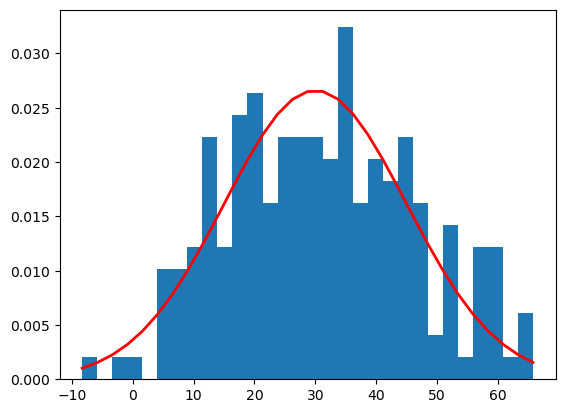

In [2]:
# gerando amostra
np.random.seed(0)
m, s, N = 30, 15, 200
x = np.random.normal(m, s, N)

# plot from numpy docs
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.

import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(s * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - m)**2 / (2 * s**2) ),
         linewidth=2, color='r')
plt.show()

In [26]:
# adicionando outliers para teste
x[0], x[1] = 100, -25

r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)

Number of outliers:  3
Indices of outliers:  [53, 52, 51]
        R      Lambda
 1   3.14819   3.15879
 2   2.97114   3.15143
 3   3.21044   3.14389
 4   2.83814   3.13616
 5   2.84416   3.12825
 6   2.87769   3.12013
 7   2.30345   3.11180
 8   2.33534   3.10324
 9   2.12480   3.09446
10   2.09054   3.08542


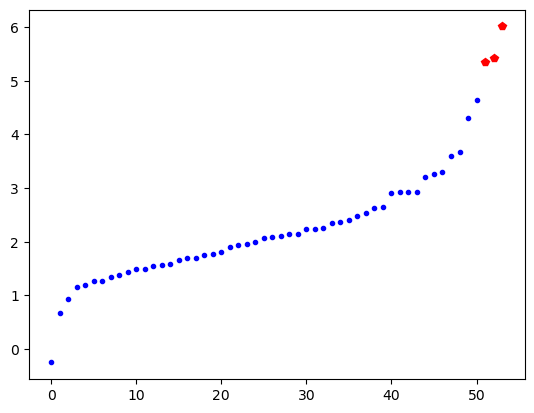

In [27]:
print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
    print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.plot(x, 'b.')
# and mark the outliers.
for i in range(r[0]):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()